## IBM Quantum Challenge Fall 2021
# Challenge 4: 電池による収益の最適化

<div id='problem'></div>
<div class="alert alert-block alert-info">
    
Quantum Challengeに最適な環境で取り組んでいただくために、右上のアカウントメニューより **light** モードを選択されることをお勧めします。

## はじめに：QAOAとは

最適化問題を解く場合、組み合わせ最適化問題の近似解を見つけるためのよく知られたアルゴリズムにQAOA（量子近似最適化アルゴリズム, Quantum approximate optimization algorithm）があります。Challenge-1のFinanceのexerciseですでに使ったかもしれませんが、それが何であるかまだ詳しく紹介していませんでした。このChallengeでは、QAOAについて、どのように動くか、またなぜ必要なのかを学びます。

QAOAとは何でしょうか？簡単に言えば、QAOAは、ansatzとして知られるパラメーター化された量子回路と、回路を最適化するための古典的な部分を組み合わせた古典量子ハイブリッドアルゴリズムです。Farhi、Goldstone、およびGutmann（2014）[**[1]**](https://arxiv.org/abs/1411.4028)によって提案されました。

これは、ユニタリー演算子$U(\boldsymbol{\beta}, \boldsymbol{\gamma})$を使用する変分アルゴリズムです。
量子状態$|\psi(\boldsymbol{\beta}, \boldsymbol{\gamma})\rangle$を準備するためのパラメーター$(\boldsymbol{\beta}, \boldsymbol{\gamma})$によって特徴付けられます。
アルゴリズムの目標は、問題が実装された量子状態$|\psi(\boldsymbol{\beta}_{opt}, \boldsymbol{\gamma}_{opt})\rangle$の最適なパラメーター$(\boldsymbol{\beta}_{opt}, \boldsymbol{\gamma}_{opt})$を見つけることです。

ユニタリー演算子$U(\boldsymbol{\beta}, \boldsymbol{\gamma})$は特定の形式を持ち、2つのユニタリー演算子$U(\boldsymbol{\beta}) = e^{-i \boldsymbol{\beta} H_B}$と$U(\boldsymbol{\gamma}) = e^{-i \boldsymbol{\gamma} H_P}$ where $H_{B}$で構成されます。このようなユニタリー演算子の選択は、量子アニーリングと呼ばれるスキームからインスピレーションを得ています。

次のように、これらの2つのユニタリー演算子のブロックを$p$回適用することによって状態が準備されます。

$$\lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle = \underbrace{U(\boldsymbol{\beta}) U(\boldsymbol{\gamma}) 
                                            \cdots U(\boldsymbol{\beta}) U(\boldsymbol{\gamma})}_{p \; \text{times}} 
\lvert \psi_0 \rangle$$

ここで$|\psi_{0}\rangle$は適切な初期状態です。

<center><img src="resources/qaoa_circuit.png" width="600"></center>    
    
QiskitのQAOA実装は、VQEを直接拡張し、VQEの一般的なハイブリッド最適化構造を継承します。QAOAの詳細については、Qiskitテキストブックの[**QAOAの章**](https://qiskit.org/textbook/ch-applications/qaoa.html)を参照してください。

## Challenge

<div class="alert alert-block alert-success">

**Goal**
    
電池による収益の最適化について量子最適化プログラミングを実装します。    

**Plan**
初めに、QAOAとナップサック問題について学びます。

**Challenge 4a**: - ナップサック問題をQAOAで解きます：一般的なナップサック問題を学び、QAOAを使って最適解を見つける方法について学びます。

**Final Challenge 4b** - 電池による収益の最適化問題をQiskit knapsackクラスで解きます：電池による収益の最適化問題について学び、QAOAで最適解を求めます。4bまでの全ての問題が解けたらバッジがもらえます。

**Final Challenge 4c** - 電池による収益の最適化問題の量子回路を実装します：電池による収益の最適化問題を解くための最小のコストと深さの量子回路を実装します。より小さい回路でより良い精度を達成してください。このexerciseが解けたら順位のためのスコアがもらえます。
  
</div>
<div class="alert alert-block alert-info">

事前学習として[**Qiskit Optimization Demo Session with Atsushi Matsuo**](https://youtu.be/claoY57eVIc?t=104)の視聴と対応する[**demo notebook**](https://github.com/qiskit-community/qiskit-application-modules-demo-sessions/tree/main/qiskit-optimization)をチェックして、Qiskitの最適化モジュールについて学ぶことをお勧めします。

</div>

上述のとおり、QAOAは、組み合わせ最適化問題の近似解を見つけるためのアルゴリズムで、組み合わせ最適化問題には、次のような様々な問題があります：
 
- TSP（巡回セールスマン問題）問題
- 配車ルートの問題
- 集合被覆問題
- ナップサック問題
- スケジューリングの問題、など

これらの問題には、解くことが難しいものが含まれ（言い換えれば、それらはNP困難問題であり）、つまり、適切な時間内で正確な解を見つけることが非現実的であるため、近似アルゴリズムが必要となります。次に、組み合わせ最適化問題の1つであるナップサック問題をQAOAを使って解く方法を紹介します。

# ナップサック問題 #
    
[**ナップサック問題**](https://ja.wikipedia.org/wiki/%E3%83%8A%E3%83%83%E3%83%97%E3%82%B5%E3%83%83%E3%82%AF%E5%95%8F%E9%A1%8C)は、次のような最適化問題です。それぞれに重量と価値がある品物のリストと、ある最大の重量を保持することのできるナップサックが与えられます。ナップザックが保持できる最大重量を超えずに価値の合計を最大化するために、ナップザックに入れる品物を決定します。最も効率的な手法は貪欲な手法ですが、それが最良の結果をもたらすとは限りません。

<center><img src="resources/Knapsack.png" width="400"></center>
    
Image source: [Knapsack.svg.](https://commons.wikimedia.org/w/index.php?title=File:Knapsack.svg&oldid=457280382)

<div id='problem'></div>
<div class="alert alert-block alert-info">
注：ナップサック問題には多くのバリエーションがあります。ここでは、0-1ナップサック問題についてのみ説明します。NP困難問題である、品物を選択するかどうか（0-1問題）です。1つの品物を分割したり、複数の同じ品物を選択したりすることはできません。
</div>

## Challenge 4a: 一般的なナップサック問題をQAOAで解く

<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Challenge 4a** <br>
容量18のナップサックと5つの荷物があります。荷物の各重量$W$が$w_i = [4,5,6,7,8]$で、価値$V$が$v_i = [5,6,7,8,9]$の場合、重量制限である18以内で荷物の価値の合計が最大になる収納方法を見つけてください。
</div>

In [69]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit import Aer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
import numpy as np
from qiskit import IBMQ, Aer, QuantumCircuit, execute  

## Challenge 4c: 電池による収益の最適化を断熱量子計算で解く 

<div class="alert alert-block alert-danger">
とうとう最終問題に到達しました！この問題には、順位がつきます。
</div>

## 背景

QAOAは、断熱量子計算から着想を得て開発されました。断熱量子計算では、量子断熱定理に基づいて、与えられたハミルトニアンの基底状態を理想的に得ることができます。したがって、最適化問題をこのハミルトニアンにマッピングすることにより、断熱量子計算で最適化問題を解くことができます。

断熱量子計算と量子回路の計算上の同等性は示されていますが、量子回路で断熱量子計算をシミュレートするには、多数のゲート操作が必要であり、現在のノイズの多い量子デバイスでは実現が困難です。QAOAは、量子古典ハイブリッドアプローチを使用してこの問題を解決します。

この追加のchallengeでは、この断熱量子計算フレームワークに基づいて、古典計算の最適化なしで最適化問題を解く量子回路を実装するように求められます。言い換えれば、構築する量子回路は、1回の実行で適切な近似解を与えることが期待されます。

Qiskit Optimization ModuleやKnapsack classは使わずに、なるべくゲート操作の少ない、つまりなるべく小さな量子回路の実装に挑戦してみましょう。最適化問題の制約を緩和することでより小さい回路で最適解を求めることができます。解法のヒントに従って解いていくことをお勧めします。

<div class="alert alert-block alert-success">

**Challenge 4c** <br>
断熱量子計算を使用して電池のスケジュールを最適化し、次の条件下で$C_{max}$以内のコストで収益の総和を最大化します。
<br>
- 時間枠の数 $t = 11$<br>
- 日々の収益 $\lambda_{1} = [3, 7, 3, 4, 2, 6, 2, 2, 4, 6, 6]$<br>
- 日々の収益 $\lambda_{2} = [7, 8, 7, 6, 6, 9, 6, 7, 6, 7, 7]$<br>
- 日々の電池の劣化 $c_{1} = [2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2]$<br>
- 日々の電池の劣化 $c_{2} = [4, 3, 3, 4, 4, 5, 3, 4, 4, 3, 4]$<br>
- $C_{max} = 33$<br>
    - **注意:** $i \in \{1,2,...,t\}$において、$\lambda_{1}[i] < \lambda_{2}[i]$ で $c_{1}[i] < c_{2}[i]$ です。
<br>
<br>
"0"は市場$M_{1}$の選択を示し、"1"は市場$M_{2}$の選択を示します。この例の場合の最適なソリューションは、"00111111000"と"10110111000"で、収益は$67$、劣化コストは$33$です。あなたのタスクは、以下の精度を満たす解を出力する断熱量子計算回路を実装することです。例とは別の$\lambda_{1}, \lambda_{2}, c_{1}, c_{2}, C_{max}$のデータセットで解答をチェックします。以下に入力データ例を示します。 この例と同じような入力を使用します。
</div>

In [70]:
instance_examples = [
    {
        'L1': [3, 7, 3, 4, 2, 6, 2, 2, 4, 6, 6],
        'L2': [7, 8, 7, 6, 6, 9, 6, 7, 6, 7, 7],
        'C1': [2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2],
        'C2': [4, 3, 3, 4, 4, 5, 3, 4, 4, 3, 4],
        'C_max': 33
    },
    {
        'L1': [4, 2, 2, 3, 5, 3, 6, 3, 8, 3, 2],
        'L2': [6, 5, 8, 5, 6, 6, 9, 7, 9, 5, 8],
        'C1': [3, 3, 2, 3, 4, 2, 2, 3, 4, 2, 2],
        'C2': [4, 4, 3, 5, 5, 3, 4, 5, 5, 3, 5],
        'C_max': 38
    },
    {
        'L1': [5, 4, 3, 3, 3, 7, 6, 4, 3, 5, 3],
        'L2': [9, 7, 5, 5, 7, 8, 8, 7, 5, 7, 9],
        'C1': [2, 2, 4, 2, 3, 4, 2, 2, 2, 2, 2],
        'C2': [3, 4, 5, 4, 4, 5, 3, 3, 5, 3, 5],
        'C_max': 35
    }
]

### 重要: 最終問題の提出ルール

<div class="alert alert-block alert-danger">
<p style="font-size:20px">
問題を解く際の注意点:

- 古典解法で最適化しないでください。
- ステップに従って関数のコードを完成し量子回路を構築してください。
- パラメーター$p$と$\alpha$については、 **$p=5$と$\alpha=1$から値を変更しないでください。**
- 量子回路は 28 qubits 以内で実装してください。
- 提出形式は、(L1、L2、C1、C2、C_max）を引数とし、QuantumCircuitを返す関数です（関数名は任意のものを付けて問題ありません）。
- 異なる入力でも問題が解ける関数にしてください。異なる入力で検証を行います。
- より低コストで0.8以上の精度(precision)が得られる回路を作成します。精度については以下で説明します。コストが低いほど良いです。
- ジョブが実行できているか心配になったからといって**何度も続けてジョブを投げないで**ください。これをすると混雑がさらにひどくなります。あなたのジョブがきちんと実行されているかはこちらで確認できます：https://quantum-computing.ibm.com/results
- チャンレジ終了後、上位10ユーザーの提出内容を審査員が審査します。そのため、**最終的なスコアやランキングはチャレンジ終了後に変わる可能性があることをご了承ください。**
- 最終確定した上位10ユーザーは、チャレンジ終了後に自身の解法について簡単な解説文を書いていただくことをお願いすることがあります。

**注：このchallengeでは、量子回路で問題を解かなければなりません。そうでない場合には、最終ランキングに順位が付けられません。**

</div>

### スコアリングのルール

提出された関数のスコアは二段階で計算されます。

1. 最初に、量子回路の出力の精度を確認します。
スコアリングの前に、解答の関数の出力の確率分布（ヒストグラム）が**平均精度0.80**を超える必要があります。これは、8つのデータを用いて計算されます(そのうち4つは固定データですが、残りの4つは複数のデータセットの中からランダムに選ばれたデータです)。この段階で提出された関数が閾値を超えなかった場合、スコアがつきません。一つの入力に対する出力のヒストグラムの精度は以下のステップで計算されます。
    
    1. この精度は、測定された制約を満たす解の値が最適な解の値にどのように近いかを評価します。
    2. まず、測定された制約を満たす解の数が非常に少ない場合、精度は0になります（下記 **"制約を満たす解の注意点"** をご確認ください）。精度が計算される前に、最も低い収益値を引くことで解の値が正規化され、最も低い収益値となる解は、精度がゼロになるようになっています。
    
    $N_s$をトータルショット数(実行数)、$N_f$を測定された制約を満たす解のショット数、$\lambda_{opt}$を最適解の値とします。$R(x)$、$C(x)$を$x\in\{0,1\}^n$の解における収益と劣化コストとします。$\lambda_{1}$の総和として計算される最も低い収益値を引くことで、値を正規化します。確率分布をヒストグラムとして指定すると、その精度は以下の式で計算されます。
    
    \begin{equation*}
    \text{precision} = \frac 1 {N_f\cdot (\lambda_{opt}-\mathrm{sum}(\lambda_{1}) )} \sum_{x, \text{$\mathrm{shots}_x$}\in \text{ prob.dist.}} (R(x)-\mathrm{sum}(\lambda_{1})) \cdot \text{$\mathrm{shots}_x$} \cdot 1_{C(x) \leq C_{max}}
    \end{equation*}
    
    ここで、$\mathrm{shots}_x$は解$x$が測定された回数です。例えば、ショット数が$N_s = 100$で、ヒストグラムの出力がhist = {"1000101": 26, "1000110": 35, "1000111": 12, "1001000": 16, "1001001": 11}で、その各状態における収益と劣化コストが以下の表になったとします。

    | 状態 | 収益 | 劣化コスト | 制約を満たすか満たさないか | ショット数 |
    |:-------:|:-------:|:-------:|:-------:|:-------:|
    | 1000101 | 46 | 16 | 1 | 26 |
    | 1000110 | 48 | 17 | 0 | 35 |
    | 1000111 | 45 | 15 | 1 | 12 |
    | 1001000 | 45 | 18 | 0 | 16 |
    | 1001001 | 42 | 16 | 1 | 11 |

    $C_{max}= 16$なので、"1000101","1000111","1001001"の状態は、制約を満たす解で、"1000110"と"1001000"は制約を満たさない解です。よって、制約を満たす解の測定される回数$N_f$は、$N_f = 26+12+11=49$と計算されます。また、最も低い収益値は、$ \mathrm{sum}(\lambda_{1}) = 5+3+3+6+9+7+1=34$です。
    従って、精度は、
    
    $$((46-34) \cdot 26 \cdot 1 + (48-34) \cdot 35 \cdot 0 + (45-34) \cdot 12 \cdot 1 + (45-34) \cdot 16 \cdot 0 + (42-34) \cdot 11 \cdot 1) / (49\cdot (50-34)) = 0.68$$
    
    と計算されます。

    **制約を満たす解の注意点**: $N_f$が20よりも小さい場合 ($ N_f < 20$)、精度は0と計算されます。

2. 提出した関数が、上記の精度を満たした場合、量子回路のコストが最終スコアとして評価されます。
スコアは、4つの入力データの回路コストの総和であり、回路コストは以下の方法で計算されます。

    1. 量子回路は、ゲート最適化やゲート分解なしに、"rz", "sx", "cx"の基本ゲートにtranspileされます。
    2. スコアは以下のように計算されます。
    
    \begin{equation*}
    \text{score} = 50 \cdot depth + 10 \cdot \#(cx) + \#(rz) + \#(sx)
    \end{equation*}
    
    ここで、$\#(gate)$は回路における$gate$の数を表します。

回路は<span style="color: deepskyblue; ">512回</span>実行されます。つまり、ここでは<span style="color: deepskyblue; ">$N_s = 512$</span>です。<br>
従って、小さいスコアであるほど、上位の順位となります。

## 一般的な解法

ここでは、ナップサック問題の「緩和された」定式化を解く[[2]](https://arxiv.org/abs/1908.02210)に示されている方法に従って答えを出します。緩和された問題は、次のように定義できます。

\begin{equation*}
\text{maximize } f(z)=return(z)+penalty(z)
\end{equation*}

\begin{equation*}
\text{where} \quad return(z)=\sum_{t=1}^{n} return_{t}(z) \quad \text{with} \quad return_{t}(z) \equiv\left(1-z_{t}\right) \lambda_{1}^{t}+z_{t} \lambda_{2}^{t}
\end{equation*}

\begin{equation*}
\quad \quad \quad \quad \quad \quad penalty(z)=\left\{\begin{array}{ll}
0 & \text{if}\quad  cost(z)<C_{\max } \\
-\alpha\left(cost(z)-C_{\max }\right) & \text{if} \quad cost(z) \geq C_{\max }, \alpha>0 \quad \text{constant}
\end{array}\right.
\end{equation*}

ここでは、線形ペナルティを計算するために非イジング目的関数が使用されます。これにより、高精度を保ちながら、回路の深さを減らすことができます。

緩和アプローチの基本のユニットは、以下の項目で構成されています。

1. 位相演算子$U(C, \gamma_i)$
    1. 収益計算パート
    2. ペナルティー計算パート
        1. 劣化コスト計算(データエンコーディング)
        2. 制約テスト($C_{max}$を超えたデータインデックスのマーク付け)
        3. ペナルティーの位相緩和(マーク付けされたインデックスにペナルティーを追加)
        4. 制約テストと劣化コスト計算の再初期化(data registerとflag registerのクリーンアップ)
2. ミキシング演算子$U(B, \beta_i)$

この手順のユニット$U(B, \beta_i)U(C, \gamma_i)$が、緩和QAOAの手順全体で$p$回繰り返されます。
<br>
各関数を1つずつ見ていきましょう。

これから作成する量子回路は、index register, data register, flag registerの3種類のレジスターで構成されています。index registerとdata registerはQRAMに使用され、電池のすべての選択可能な劣化コストのデータが含まれています。ここで、これらのレジスターは、次の名前の関数テンプレートを使います。

- `qr_index`: インデックスを表す量子レジスター（各時間枠で0または1を選択）
- `qr_data`: 各インデックスに関連付けられた総劣化コストを表す量子レジスター
- `qr_f`: ペナルティ位相緩和のフラグを格納する量子レジスター
<br>

また、次の変数を使用して、各レジスターの量子ビット数を表します。
- `index_qubits`: `qr_index`における量子ビット数
- `data_qubits`: `qr_data`における量子ビット数

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 1</b>
</div>

## 位相演算子 $U(C, \gamma_i)$
### 収益計算パート
収益計算パートの$return (z)$は次のように変換できます：

\begin{equation*}
\begin{aligned}
e^{-i \gamma_i . return(z)}\left|z\right\rangle 
&=\prod_{t=1}^{n} e^{-i \gamma_i return_{t}(z)}\left|z\right\rangle \\
&=e^{i \theta} \bigotimes_{t=1}^{n} e^{-i \gamma_i z_{t}\left(\lambda_{2}^{t}-\lambda_{1}^{t}\right)}\left|z_{t}\right\rangle \\
\text{with}\quad \theta &=\sum_{t=1}^{n} \lambda_{1}^{t}\quad \text{constant}
\end{aligned}
\end{equation*}

一定の位相回転は無視できるので、収益計算パート$return (z)$は、各量子ビットに対して、回転ゲート $U_1\left(\gamma_i \left(\lambda_{2}^{t}-\lambda_{1}^{t}\right)\right)= e^{-i \frac{\gamma_i \left(\lambda_{2}^{t}-\lambda_{1}^{t}\right)}  2}$で実装できます。
<br>
<br>
次のセルの空欄を埋めて、`phase_return`関数を完成させます。

In [71]:
from typing import List, Union
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble
from qiskit.compiler import transpile
from qiskit.circuit import Gate
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit.library import QFT

In [72]:
L1 = [4, 2, 2]
L2 = [6, 5, 8,]
C1 = [3, 3, 5]
C2 = [4, 4, 3]
C_max = 12
alpha=0.2
beta=0.1
gamma=0.3

index_qubits = len(L1)
    
# the maximum possible total cost
max_c = sum([max(l0, l1) for l0, l1 in zip(C1, C2)])
    
# the number of qubits representing data values can be defined using the maximum possible total cost as follows:
data_qubits = math.ceil(math.log(max_c, 2)) + 1 if not max_c & (max_c - 1) == 0 else math.ceil(math.log(max_c, 2)) + 2

backend = Aer.get_backend('qasm_simulator')
shots = 1024


print('C_max',C_max)
print('max_c',max_c)
print('index_qubits',index_qubits)
print('data_qubits',data_qubits)

C_max 12
max_c 13
index_qubits 3
data_qubits 5


In [73]:
def phase_return(index_qubits: int, gamma: float, L1: list, L2: list, to_gate=True) -> Union[Gate, QuantumCircuit]:
    qr_index = QuantumRegister(index_qubits, "index")
    qc = QuantumCircuit(qr_index)
    
    ##############################
    ### U_1(gamma * (lambda2 - lambda1)) for each qubit ###
    for i in range(index_qubits):
        qc.u1(gamma*(L2[i]-L1[i]),i)
    ##############################
    
    return qc.to_gate(label=" phase return ") if to_gate else qc

In [74]:
#qr_index = QuantumRegister(index_qubits, "index") # index register
#qr_data = QuantumRegister(data_qubits, "data") # data register
#qr_f = QuantumRegister(1, "flag") # flag register
#cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
#qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)
    
### initialize the index register with uniform superposition state ###
#qc.h(qr_index)

#qc.append(phase_return(index_qubits, gamma, L1, L2, to_gate=False),qr_index)
#qc.measure_all()
#execute(qc,backend,shots=shots).result().get_counts()
#qc.draw()

## 位相演算子 $U(C, \gamma_i)$
### ペナルティー計算パート

このパートでは、劣化コストの総和が制約$C_{max}$を超えるインデックスレジスターの量子状態にペナルティを追加する方法を検討します。

上で示したように、以下の4つのステップで実装できます。

1. 劣化コスト計算(データエンコーディング)
2. 制約テスト($C_{max}$を超えたデータインデックスのマーク付け)
3. ペナルティーの位相緩和(マーク付けされたインデックスにペナルティーを追加)
4. 制約テストと劣化コスト計算の再初期化(data registerとflag registerのクリーンアップ)

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 2</b>
</div>

#### 劣化コスト計算(データエンコーディング)

解のすべての選択肢の劣化コストの合計を表すために、QRAM構造を使用できます。
量子回路でQRAMを実装するには、加算関数が役立ちます。
ここでは、まず定数値を加算する関数を用意します。
<br>
<br>
<br>
データに定数値を方法には以下のものがあります
- 一連の全加算器
- プレイン加算器ネットワーク [[3]](https://arxiv.org/abs/quant-ph/9511018)
- リップルキャリー加算器 [[4]](https://arxiv.org/abs/quant-ph/0410184)
- QFT加算器 [[5](https://arxiv.org/abs/quant-ph/0008033), [6](https://arxiv.org/abs/1411.5949)]
- など...
<br>

加算器にはそれぞれ特徴があります。ここでは、加算数が増えても回路コストが上昇しにくいQFT加算器の実装方法を例に簡単に説明します。

1. 目的の量子レジスターに対してQFTを行う
2. 定数の量子レジスターを制御として目的の量子レジスターをローカル位相回転する
3. 目的の量子レジスターに関してIQFTを行う
<br>
<br>

次のセルの空欄を埋めて、`const_adder` と`subroutine_add_const`関数を完成させます。

In [75]:
def subroutine_add_const(data_qubits: int, const: int, to_gate=True) -> Union[Gate, QuantumCircuit]:
    qc = QuantumCircuit(data_qubits)
    ##############################
    ### Phase Rotation ###
    # Provide your code here
    sub, const = (True, - const) if const < 0 else (False, const)
    sign = "-" if sub else "+"
    for i in range(0, data_qubits-1): # qubits to be applied
        for j in range(0, data_qubits - 1 - i): # 
            if const >> (data_qubits - 2 - (i + j)) & 1:
                if sub:
                    qc.rz(-math.pi / (2 ** j), data_qubits - 2 - i)
                else:
                    qc.rz(math.pi / (2 ** j), data_qubits - 2 - i)
    for j in range(0, data_qubits-1):
        if const >> (data_qubits - 2 - j) & 1:
            if sub:
                qc.rz(-math.pi / (2 ** (j + 1)), data_qubits-1)
            else:
                qc.rz(math.pi / (2 ** (j + 1)), data_qubits-1)
    
    ##############################
    return qc.to_gate(label=" [+"+str(const)+"] ") if to_gate else qc


In [76]:
#qr_index = QuantumRegister(index_qubits, "index") # index register
#qr_data = QuantumRegister(data_qubits, "data") # data register
#qr_f = QuantumRegister(1, "flag") # flag register
#cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
#qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)

In [77]:
def const_adder(data_qubits: int, const: int, to_gate=True) -> Union[Gate, QuantumCircuit]:
    
    qr_data = QuantumRegister(data_qubits, "data")
    qc = QuantumCircuit(qr_data)
    
    #qc.x(3)
    ##############################
    ### QFT ###
    # Provide your code here
    qft = QFT(data_qubits, approximation_degree=1, do_swaps=False, inverse=False, name='QFT').to_gate()  
    qc.append(qft,qr_data[:]) 
    ##############################

    ##############################
    ### Phase Rotation ###
    # Use `subroutine_add_const`
    qc.append(subroutine_add_const(data_qubits, const, to_gate=True),qr_data[:])
    ##############################
    
    ##############################
    ### IQFT ###
    # Provide your code here
    iqft = QFT(data_qubits, approximation_degree=1, do_swaps=False, inverse=True, name='IQFT').to_gate()     
    qc.append(iqft,qr_data[:])
    ##############################
    return qc.to_gate(label=" [ +" + str(const) + "] ") if to_gate else qc

In [121]:
qr_index = QuantumRegister(index_qubits, "index") # index register
qr_data = QuantumRegister(data_qubits, "data") # data register
qr_f = QuantumRegister(1, "flag") # flag register
cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
cr_data = ClassicalRegister(data_qubits)
qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index, cr_data)


### initialize the index register with uniform superposition state ###
#qc.x(1)
qc=(const_adder(data_qubits,6, to_gate=False))
#qc=(const_adder(data_qubits, 0, to_gate=False))
qc.measure_all()
qc.draw()
execute(qc,backend,shots=shots).result().get_counts()

{'00110': 1024}

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 3</b>
</div>

ここでは、コストをQRAM形式で保存します：

\begin{equation*}
\sum_{x\in\{0,1\}^t} \left|x\right\rangle\left|cost(x)\right\rangle
\end{equation*}

ここで、$t$は時間枠の数（=インデックスレジスターのサイズ）であり、$x$はすべての時間枠での市場の選択のパターンです。

2つのリスト$C^1 = \left[c_0^1, c_1^1, \cdots\right]$と$C^2 = \left[c_0^2, c_1^2, \cdots\right]$が与えられた場合、各index qubitによる制御ゲートを使用して、これらのデータの「各選択肢の合計」をエンコードできます。
<br>

$i$番目のindex qubitが0のデータに$c_i^1$を追加し、$i$番目のindex qubitが1のデータに$c_i^2$を追加したい場合、index registerの$i$番目の量子ビットが0の場合は$C_i^1$をindex registerに追加し、index registerの$i$番目の量子ビットが1の場合は$C_i^2$をdata registerに追加できます。これらの操作は、制御ゲートによって実現できます。 タイプ`qiskit.circuit.Gate`のゲートから制御されたゲートを作成する場合は、`control()` メソッドが役立つ場合があります。
<br>
<br>
次のセルの空欄を埋めて、`cost_calculation`関数を完成させます。

In [48]:
def cost_calculation(index_qubits: int, data_qubits: int, list1: list, list2: list, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_index = QuantumRegister(index_qubits, "index")
    qr_data = QuantumRegister(data_qubits, "data")
    qc = QuantumCircuit(qr_index, qr_data)

    for i, (val1, val2) in enumerate(zip(list1, list2)):
        
        ##############################
        ### Add val2 using const_adder controlled by i-th index register (set to 1) ###
        # Put your implementation here
        ##############################
        add_val2 =  const_adder(data_qubits,val2,to_gate=True).control()
        temp=[qr_index[i]] 
        for k in range(data_qubits):
            temp.append(qr_data[k])

        qc.append(add_val2,temp)        
        qc.x(qr_index[i])
        
        ##############################
        ### Add val1 using const_adder controlled by i-th index register (set to 0)  ###
        # Put your implementation here
        ##############################
        add_val1 =  const_adder(data_qubits,val1,to_gate=True).control()                 
        qc.append(add_val1,temp) 
        qc.x(qr_index[i])
    
    return qc.to_gate(label=" Cost Calculation ") if to_gate else qc

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 4</b>
</div>

#### 制約テスト
劣化コスト計算のプロセスの後、すべてのindexでflag qubitがゼロに設定されたEntanbled QRAMを取得しました。

\begin{equation*}
\sum_{x\in\{0,1\}^t} \left|x\right\rangle\left|cost(x)\right\rangle\left|0\right\rangle
\end{equation*}

劣化コストの値が$C_{max}$より大きいindexにペナルティを追加するには、次の状態を準備する必要があります:

\begin{equation*}
\sum_{x\in\{0,1\}^t} \left|x\right\rangle\left|cost(x)\right\rangle\left|cost(x)\geq C_{max}\right\rangle
\end{equation*}
<br>
<br>
次のセルの空欄を埋めて、`constraint_testing`関数を完成させます。

In [49]:
def constraint_testing(data_qubits: int, C_max: int, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_data = QuantumRegister(data_qubits, "data")
    qr_f = QuantumRegister(1, "flag")
    qc = QuantumCircuit(qr_data, qr_f)
    
    ##############################
    ### Set the flag register for indices with costs larger than C_max ###
    # Put your implementation here
    ##############################

    # get constant c from C_max
    c = math.ceil(math.log(C_max, 2))
    omega = 2**c - C_max

    plus_omega=const_adder(data_qubits, omega, to_gate=True)  
    qc.append(plus_omega,qr_data[:])

    qc.cx(qr_data[c],qr_f[0])    
       
    minus_omega=const_adder(data_qubits, (-1)*omega, to_gate=True)       
    qc.append(minus_omega,qr_data[:])  
    
    return qc.to_gate(label=" Constraint Testing ") if to_gate else qc

In [50]:
qr_index = QuantumRegister(index_qubits, "index") # index register
qr_data = QuantumRegister(data_qubits, "data") # data register
qr_f = QuantumRegister(1, "flag") # flag register
cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)
    
### initialize the index register with uniform superposition state ###
qc.h(qr_index)

qc.append(phase_return(index_qubits, gamma, L1, L2, to_gate=False),qr_index)
qc.append(cost_calculation(index_qubits, data_qubits, C1, C2), qr_index[:] + qr_data[:])
qc.append(constraint_testing(data_qubits, C_max), qr_data[:] + qr_f[:])
qc.measure_all()
execute(qc,backend,shots=shots).result().get_counts()
#qc.draw()

{'111011111 000': 1,
 '111001100 000': 3,
 '011101011 000': 1,
 '101101011 000': 124,
 '001011000 000': 124,
 '001010101 000': 127,
 '001010110 000': 124,
 '101100010 000': 137,
 '001011111 000': 116,
 '101100001 000': 137,
 '001001100 000': 130}

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 5</b>
</div>

#### ペナルティーの位相緩和

また、次の方法で、合計劣化コストが$C_{max}$ を超えるインデックスにペナルティを追加する必要があります。

\begin{equation*}
\quad \quad \quad \quad \quad \quad penalty(z)=\left\{\begin{array}{ll}
0 & \text{if}\quad  cost(z)<C_{\max } \\
-\alpha\left(cost(z)-C_{\max }\right) & \text{if} \quad cost(z) \geq C_{\max }, \alpha>0 \quad \text{constant}
\end{array}\right.
\end{equation*}

このペナルティは、量子演算子$e^{i \gamma \alpha\left(cost(z)-C_{\max }\right)}$として説明できます。
<br>
このユニタリー演算子を量子回路として実装するために、以下の性質に注目します。

\begin{equation*}
\alpha\left(cost(z)-C_{m a x}\right)=\sum_{j=0}^{k-1} 2^{j} \alpha A_{1}[j]-2^{c} \alpha
\end{equation*}

ここで、$A_1$はqram dataのquantum register、$A_1[j]$は$A_1$の$j$番目のqubit、$k$と$c$は適切な定数です。

この性質を使用すると、ペナルティ位相部分は、flag registerによって制御されるQRAMのdata registerの各桁の回転ゲートとして実現できます。
<br>
<br>
次のセルの空欄を埋めて、`penalty_dephasing`関数を完成させます。

In [56]:
def penalty_dephasing(data_qubits: int, alpha: float, gamma: float, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_data = QuantumRegister(data_qubits, "data")
    qr_f = QuantumRegister(1, "flag")
    qc = QuantumCircuit(qr_data, qr_f)
    
    ##############################
    ### Phase Rotation ###
    # Put your implementation here
    ##############################
    for i in range(data_qubits):
        qc.crz(2**i*alpha*gamma,control_qubit=qr_f[0],target_qubit=qr_data[i])
    
    return qc.to_gate(label=" Penalty Dephasing ") if to_gate else qc

In [57]:
qr_index = QuantumRegister(index_qubits, "index") # index register
qr_data = QuantumRegister(data_qubits, "data") # data register
qr_f = QuantumRegister(1, "flag") # flag register
cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)
    
### initialize the index register with uniform superposition state ###
qc.h(qr_index)

qc.append(phase_return(index_qubits, gamma, L1, L2, to_gate=False),qr_index)
qc.append(cost_calculation(index_qubits, data_qubits, C1, C2), qr_index[:] + qr_data[:])
qc.append(constraint_testing(data_qubits, C_max), qr_data[:] + qr_f[:])
qc.append(penalty_dephasing(data_qubits, alpha, gamma), qr_data[:] + qr_f[:])
qc.measure_all()
execute(qc,backend,shots=shots).result().get_counts()
#qc.draw()

{'111011111 000': 3,
 '011101011 000': 2,
 '101101011 000': 120,
 '001011000 000': 135,
 '111011000 000': 2,
 '001010101 000': 146,
 '001011111 000': 120,
 '101100010 000': 124,
 '001010110 000': 129,
 '101100001 000': 120,
 '001001100 000': 123}

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 6</b>
</div>

#### 再初期化

data registerやflag registerなどの補助量子ビットは、演算子$U(C, \gamma_i)$が終了したときにゼロ状態に再初期化する必要があります。
<br>
`qiskit.circuit.Gate`の逆ユニタリーを適用する場合は、`inverse()`メソッドが役立つ場合があります。
<br>
<br>
次のセルの空欄を埋めて、`reinitialization`関数を完成させます。

In [53]:
def reinitialization(index_qubits: int, data_qubits: int, C1: list, C2: list, C_max: int, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_index = QuantumRegister(index_qubits, "index")
    qr_data = QuantumRegister(data_qubits, "data")
    qr_f = QuantumRegister(1, "flag")
    qc = QuantumCircuit(qr_index, qr_data, qr_f)
    
    ##############################
    ### Reinitialization Circuit ###
    # Put your implementation here
    ##############################
    const_gate = constraint_testing(data_qubits, C_max, to_gate = True).inverse()
    cost_gate = cost_calculation(index_qubits,data_qubits,C1,C2,to_gate=True).inverse()    

    qc.append(const_gate, qr_data[:] + qr_f[:])  
    qc.append(cost_gate,qr_index[:] + qr_data[:]) 
    
    return qc.to_gate(label=" Reinitialization ") if to_gate else qc

In [54]:
qr_index = QuantumRegister(index_qubits, "index") # index register
qr_data = QuantumRegister(data_qubits, "data") # data register
qr_f = QuantumRegister(1, "flag") # flag register
cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)
    
### initialize the index register with uniform superposition state ###
qc.h(qr_index)

qc.append(phase_return(index_qubits, gamma, L1, L2, to_gate=False),qr_index)
qc.append(cost_calculation(index_qubits, data_qubits, C1, C2), qr_index[:] + qr_data[:])
qc.append(constraint_testing(data_qubits, C_max), qr_data[:] + qr_f[:])
qc.append(penalty_dephasing(data_qubits, alpha, gamma), qr_data[:] + qr_f[:])
qc.append(reinitialization(index_qubits, data_qubits, C1, C2, C_max), qr_index[:] + qr_data[:] + qr_f[:])
qc.measure_all()
execute(qc,backend,shots=shots).result().get_counts()
#qc.draw()

{'010000111 000': 1,
 '010000011 000': 1,
 '010000100 000': 3,
 '010000000 000': 1,
 '000000001 000': 119,
 '000000010 000': 136,
 '000000011 000': 152,
 '000000100 000': 113,
 '000000000 000': 115,
 '000000101 000': 114,
 '000000111 000': 138,
 '000000110 000': 131}

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 7</b>
</div>

### ミキシング演算子 $U(B, \beta_i)$

最後に、位相演算子$U(C,\gamma_i)$の後にミキシング演算子$U(B,\beta_i)$を追加する必要があります。ミキシング演算子は次のように表すことができます。

\begin{equation*}
U(B, \beta_i)=\exp (-i \beta_i B)=\prod_{i=j}^{n} \exp \left(-i \beta_i \sigma_{j}^{x}\right)
\end{equation*}

この演算子は、index registerの各qubitへの$R_x(2\beta_i)$ゲートによって実現できます。
<br>
<br>
次のセルの空欄を埋めて、`mixing_operator`関数を完成させます。

In [55]:
def mixing_operator(index_qubits: int, beta: float, to_gate = True) -> Union[Gate, QuantumCircuit]:
    
    qr_index = QuantumRegister(index_qubits, "index")
    qc = QuantumCircuit(qr_index)
    
    ##############################
    ### Mixing Operator ###
    # Put your implementation here
    ##############################
    for i in range(index_qubits):
        qc.rx(2*beta,i)    
    
    return qc.to_gate(label=" Mixing Operator ") if to_gate else qc

<div class="alert alert-block alert-success">
<b>Challenge 4c - Step 8</b>
</div>
最後に、上記で作成した関数を使用して、緩和QAOAプロセス全体の提出用関数`solver_function`を作成します。

次のセルのTODOの部分に入力して、解答関数を完成させます。
- 上記で作成した関数をコピーしてペーストすることができます。
- 必要に応じて、量子ビットの数とその配置を調整することもできます。

In [25]:
def solver_function(L1: list, L2: list, C1: list, C2: list, C_max: int) -> QuantumCircuit:
    
    # the number of qubits representing answers
    index_qubits = len(L1)
    
    # the maximum possible total cost
    max_c = sum([max(l0, l1) for l0, l1 in zip(C1, C2)])
    
    # the number of qubits representing data values can be defined using the maximum possible total cost as follows:
    data_qubits = math.ceil(math.log(max_c, 2)) + 1 if not max_c & (max_c - 1) == 0 else math.ceil(math.log(max_c, 2)) + 2
    
    ### Phase Operator ###
    # return part
    def phase_return(index_qubits: int, gamma: float, L1: list, L2: list, to_gate=True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_index = QuantumRegister(index_qubits, "index")
        qc = QuantumCircuit(qr_index)
    
        ##############################
        ### U_1(gamma * (lambda2 - lambda1)) for each qubit ###
        for i in range(index_qubits):
            qc.u1(gamma*(L2[i]-L1[i]),i)
        ##############################
    
        return qc.to_gate(label=" phase return ") if to_gate else qc        
        ##############################
    
    # penalty part
    def subroutine_add_const(data_qubits: int, const: int, to_gate=True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qc = QuantumCircuit(data_qubits)
        ##############################
        ### Phase Rotation ###
        # Provide your code here
        sub, const = (True, - const) if const < 0 else (False, const)
        sign = "-" if sub else "+"
        for i in range(0, data_qubits-1): # qubits to be applied
            for j in range(0, data_qubits - 1 - i): # 
                if const >> (data_qubits - 2 - (i + j)) & 1:
                    if sub:
                        qc.p(-math.pi / (2 ** j), data_qubits - 2 - i)
                    else:
                        qc.p(math.pi / (2 ** j), data_qubits - 2 - i)
        for j in range(0, data_qubits-1):
            if const >> (data_qubits - 2 - j) & 1:
                if sub:
                    qc.p(-math.pi / (2 ** (j + 1)), data_qubits-1)
                else:
                    qc.p(math.pi / (2 ** (j + 1)), data_qubits-1)
    
        ##############################
        return qc.to_gate(label=" [+"+str(const)+"] ") if to_gate else qc        
        ##############################

    # penalty part
    def const_adder(data_qubits: int, const: int, to_gate=True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_data = QuantumRegister(data_qubits, "data")
        qc = QuantumCircuit(qr_data)
    
        ##############################
        ### QFT ###
        # Provide your code here
        qft = QFT(data_qubits, approximation_degree=0, do_swaps=False, inverse=False, name='QFT').to_gate()  
        qc.append(qft,qr_data[:]) 
        ##############################

        ##############################
        ### Phase Rotation ###
        # Use `subroutine_add_const`
        qc.append(subroutine_add_const(data_qubits, const, to_gate=True),qr_data[:])
        ##############################
    
        ##############################
        ### IQFT ###
        # Provide your code here
        iqft = QFT(data_qubits, approximation_degree=0, do_swaps=False, inverse=True, name='IQFT').to_gate()     
        qc.append(iqft,qr_data[:])
        ##############################
        return qc.to_gate(label=" [ +" + str(const) + "] ") if to_gate else qc        
        ##############################
    
    # penalty part
    def cost_calculation(index_qubits: int, data_qubits: int, list1: list, list2: list, to_gate = True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_index = QuantumRegister(index_qubits, "index")
        qr_data = QuantumRegister(data_qubits, "data")
        qc = QuantumCircuit(qr_index, qr_data)

        for i, (val1, val2) in enumerate(zip(list1, list2)):
        
            ##############################
            ### Add val2 using const_adder controlled by i-th index register (set to 1) ###
            # Put your implementation here
            ##############################
            add_val2 =  const_adder(data_qubits,val2,to_gate=True).control(1)
            temp=[qr_index[i]] 
            for k in range(data_qubits):
                temp.append(qr_data[k])

            qc.append(add_val2,temp)        
            qc.x(qr_index[i])
        
            ##############################
            ### Add val1 using const_adder controlled by i-th index register (set to 0)  ###
            # Put your implementation here
            ##############################
            add_val1 =  const_adder(data_qubits,val1,to_gate=True).control(1)                 
            qc.append(add_val1,temp) 
            qc.x(qr_index[i])
    
        return qc.to_gate(label=" Cost Calculation ") if to_gate else qc        
        ##############################
    
    # penalty part
    def constraint_testing(data_qubits: int, C_max: int, to_gate = True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_data = QuantumRegister(data_qubits, "data")
        qr_f = QuantumRegister(1, "flag")
        qc = QuantumCircuit(qr_data, qr_f)
    
        ##############################
        ### Set the flag register for indices with costs larger than C_max ###
        # Put your implementation here
        ##############################

        # get constant c from C_max
        c = math.ceil(math.log(C_max, 2))
        omega = 2**c - C_max

        plus_omega=const_adder(data_qubits, omega, to_gate=True)  
        qc.append(plus_omega,qr_data[:])
        qc.cx(qr_data[c],qr_f[0])    
 
        minus_omega=const_adder(data_qubits, (-1)*omega, to_gate=True)       
        qc.append(minus_omega,qr_data[:])  
    
        return qc.to_gate(label=" Constraint Testing ") if to_gate else qc        
        ##############################
    
    # penalty part
    def penalty_dephasing(data_qubits: int, alpha: float, gamma: float, to_gate = True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_data = QuantumRegister(data_qubits, "data")
        qr_f = QuantumRegister(1, "flag")
        qc = QuantumCircuit(qr_data, qr_f)
    
        ##############################
        ### Phase Rotation ###
        # Put your implementation here
        ##############################
        for i in range(data_qubits):
            qc.cu1(2**i*alpha*gamma,control_qubit=qr_f[0],target_qubit=qr_data[i])
    
        return qc.to_gate(label=" Penalty Dephasing ") if to_gate else qc        
        ##############################
        
    # penalty part
    def reinitialization(index_qubits: int, data_qubits: int, C1: list, C2: list, C_max: int, to_gate = True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_index = QuantumRegister(index_qubits, "index")
        qr_data = QuantumRegister(data_qubits, "data")
        qr_f = QuantumRegister(1, "flag")
        qc = QuantumCircuit(qr_index, qr_data, qr_f)
    
        ##############################
        ### Reinitialization Circuit ###
        # Put your implementation here
        ##############################
        const_gate = constraint_testing(data_qubits, C_max, to_gate = True).inverse()
        cost_gate = cost_calculation(index_qubits,data_qubits,C1,C2,to_gate=True).inverse()    

        qc.append(const_gate, qr_data[:] + qr_f[:])  
        qc.append(cost_gate,qr_index[:] + qr_data[:]) 
    
        return qc.to_gate(label=" Reinitialization ") if to_gate else qc        
        ##############################

    ### Mixing Operator ###
    def mixing_operator(index_qubits: int, beta: float, to_gate = True):
        ##############################
        ### TODO ###
        ### Paste your code from above cells here ###
        qr_index = QuantumRegister(index_qubits, "index")
        qc = QuantumCircuit(qr_index)
    
        ##############################
        ### Mixing Operator ###
        # Put your implementation here
        ##############################
        for i in range(index_qubits):
            qc.rx(2*beta,i)    
    
        return qc.to_gate(label=" Mixing Operator ") if to_gate else qc       
        ##############################
    
    qr_index = QuantumRegister(index_qubits, "index") # index register
    qr_data = QuantumRegister(data_qubits, "data") # data register
    qr_f = QuantumRegister(1, "flag") # flag register
    cr_index = ClassicalRegister(index_qubits, "c_index") # classical register storing the measurement result of index register
    qc = QuantumCircuit(qr_index, qr_data, qr_f, cr_index)
    
    ### initialize the index register with uniform superposition state ###
    qc.h(qr_index)
    
    ### DO NOT CHANGE THE CODE BELOW
    p = 1
    alpha = 1
    for i in range(p):
        
        ### set fixed parameters for each round ###
        beta = 1 - (i + 1) / p
        gamma = (i + 1) / p
        
        ### return part ###
        qc.append(phase_return(index_qubits, gamma, L1, L2), qr_index)
        
        ### step 1: cost calculation ###
        qc.append(cost_calculation(index_qubits, data_qubits, C1, C2), qr_index[:] + qr_data[:])
        
        ### step 2: Constraint testing ###
        qc.append(constraint_testing(data_qubits, C_max), qr_data[:] + qr_f[:])
        
        ### step 3: penalty dephasing ###
        qc.append(penalty_dephasing(data_qubits, alpha, gamma), qr_data[:] + qr_f[:])
        
        ### step 4: reinitialization ###
        qc.append(reinitialization(index_qubits, data_qubits, C1, C2, C_max), qr_index[:] + qr_data[:] + qr_f[:])
        
        ### mixing operator ###
        qc.append(mixing_operator(index_qubits, beta), qr_index)

    ### measure the index ###
    ### since the default measurement outcome is shown in big endian, it is necessary to reverse the classical bits in order to unify the endian ###
    qc.measure(qr_index, cr_index[::-1])
    
    return qc

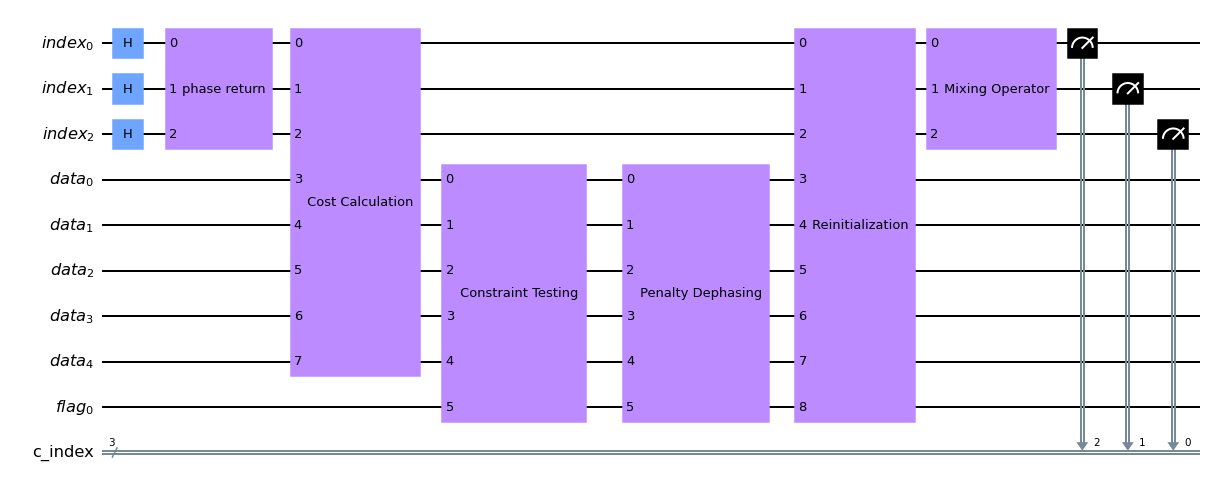

In [29]:
#check
L1 = [4, 2, 2, 3, 5, 3, 6, 3, 8, 3, 2]
L2 = [6, 5, 8, 5, 6, 6, 9, 7, 9, 5, 8]
C1 = [3, 3, 2, 3, 4, 2, 2, 3, 4, 2, 2]
C2 = [4, 4, 3, 5, 5, 3, 4, 5, 5, 3, 5]
L1 = [4, 2, 2 ]
L2 = [6, 5, 8]
C1 = [3, 3, 2]
C2 = [4, 4, 3]
C_max = 15
qc=solver_function(L1, L2, C1, C2, C_max)
qc.draw('mpl')

検証関数には、4つの入力インスタンス(データセット)が含まれています。出力は、スコアリングの前に、8つの入力インスタンスに対する精度のしきい値0.80をパスする必要があります。

In [33]:
# Execute your circuit with following prepare_ex4c() function.
# The prepare_ex4c() function works like the execute() function with only QuantumCircuit as an argument.
from qc_grader import prepare_ex4c
job = prepare_ex4c(solver_function)

result = job.result()

ModuleNotFoundError: No module named 'qc_grader'

In [ ]:
# Check your answer using following code
from qc_grader import grade_ex4c
grade_ex4c(job)

### References
1. Edward Farhi and Jeffrey Goldstone and Sam Gutmann (2014). A Quantum Approximate Optimization Algorithm. (https://arxiv.org/abs/1411.4028)
2. Grand'rive, Pierre & Hullo, Jean-Francois (2019). Knapsack Problem variants of QAOA for battery revenue optimisation.  (https://arxiv.org/abs/1908.02210)
3. V. Vedral, A. Barenco, A. Ekert (1995). Quantum Networks for Elementary Arithmetic Operations. (https://arxiv.org/abs/quant-ph/9511018)
4. Steven A. Cuccaro, Thomas G. Draper, Samuel A. Kutin, David Petrie Moulton (2004). A new quantum ripple-carry addition circuit. (https://arxiv.org/abs/quant-ph/0410184)
5. Thomas G. Draper (2000). Addition on a Quantum Computer (https://arxiv.org/abs/quant-ph/0008033)
6. Lidia Ruiz-Perez, Juan Carlos Garcia-Escartin (2014). Quantum arithmetic with the Quantum Fourier Transform. (https://arxiv.org/abs/1411.5949)

## Additional information

**Created by:** Bo Yang, Hyungseok Chang, Sitong Liu, Kifumi Numata

**Version:** 1.0.1